In [19]:
!pip install gdown  # Ensure gdown is installed
!gdown --id 1RAdJlnSbOkaiOenci4wlDWuJnPKIrpvM -O hindi_female_english.zip


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1RAdJlnSbOkaiOenci4wlDWuJnPKIrpvM
From (redirected): https://drive.google.com/uc?id=1RAdJlnSbOkaiOenci4wlDWuJnPKIrpvM&confirm=t&uuid=fe29659e-99ea-4a0d-a3e4-8ca6dff4e689
To: /content/hindi_female_english.zip
100% 2.63G/2.63G [00:27<00:00, 95.6MB/s]


In [2]:
import zipfile

zip_path = "hindi_female_english.zip"
extract_path = "hindi_female_english"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Complete!")


Extraction Complete!


In [3]:
import os

extract_path = "/content/hindi_female_english/english/wav"
files = os.listdir(extract_path)

print("Total Files:", len(files))
print("First 10 Files:", files[:10])


Total Files: 6765
First 10 Files: ['train_hindifullmale_01277.wav', 'train_hindifullmale_06103.wav', 'train_hindifullmale_00336.wav', 'train_hindifullmale_05074.wav', 'train_hindifullmale_04041.wav', 'train_hindifullmale_06676.wav', 'train_hindifullmale_02079.wav', 'train_hindifullmale_00582.wav', 'train_hindifullmale_04763.wav', 'train_hindifullmale_01462.wav']


In [4]:
!pip install librosa pydub numpy matplotlib


In [5]:
!pip install librosa pydub numpy matplotlib


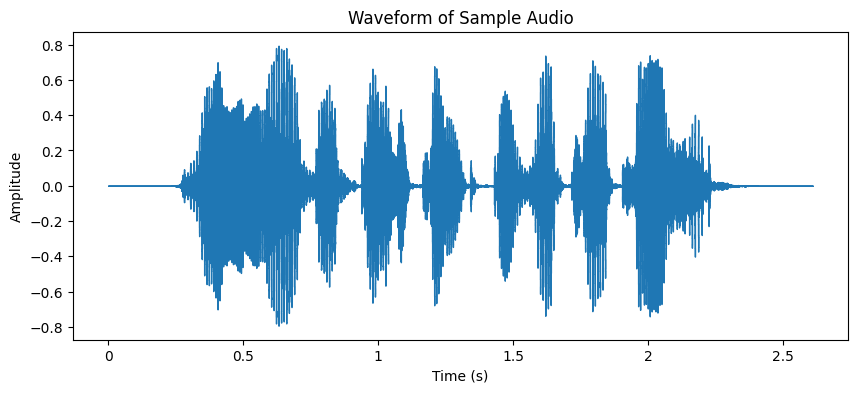

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an example audio file
audio_path = os.path.join(extract_path, files[0])  # First file
y, sr = librosa.load(audio_path)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Sample Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [7]:
import numpy as np

# Extract Features
pitch = librosa.yin(y, fmin=50, fmax=300)  # Estimate pitch
loudness = librosa.feature.rms(y=y)  # Root Mean Square Energy
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)  # Tempo estimation

# Print Results
print(f"Pitch (Mean): {np.nanmean(pitch):.2f} Hz")
print(f"Loudness (Mean RMS): {np.nanmean(loudness):.4f}")
print(f"Tempo: {tempo[0]:.2f} BPM" if len(tempo) > 0 else "Tempo: Not Detected")


Pitch (Mean): 139.91 Hz
Loudness (Mean RMS): 0.1159
Tempo: 123.05 BPM


In [8]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

# Directory where audio files are stored
extract_path = "/content/hindi_female_english/english/wav"

# List all .wav files
audio_files = [f for f in os.listdir(extract_path) if f.endswith('.wav')]
print(f"Total Audio Files: {len(audio_files)}")

# Function to extract features
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)  # Load audio

        pitch = librosa.yin(y, fmin=50, fmax=300)  # Pitch estimation
        loudness = librosa.feature.rms(y=y)  # Loudness (RMS Energy)
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)  # Tempo estimation

        return {
            "file_name": os.path.basename(file_path),
            "pitch_mean": np.nanmean(pitch),
            "loudness_mean": np.nanmean(loudness),
            "tempo": tempo[0] if len(tempo) > 0 else 0  # Handle empty tempo values
        }
    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")
        return None

# Process all files with a progress bar
features_list = []
for file in tqdm(audio_files, desc="🔄 Extracting Features", unit="file"):
    file_path = os.path.join(extract_path, file)
    features = extract_features(file_path)
    if features:
        features_list.append(features)

# Convert to DataFrame
df = pd.DataFrame(features_list)

# Save to CSV for future use
df.to_csv("audio_features.csv", index=False)

print("\n✅ Feature extraction complete! Saved as audio_features.csv.")


Total Audio Files: 6765


🔄 Extracting Features: 100%|██████████| 6765/6765 [16:06<00:00,  7.00file/s]


✅ Feature extraction complete! Saved as audio_features.csv.


In [20]:
df = pd.read_csv("audio_features.csv")
print(df.head())  # Show first few rows


                       file_name  pitch_mean  loudness_mean       tempo
0  train_hindifullmale_01277.wav  113.698363       0.108726  122.282609
1  train_hindifullmale_06103.wav  107.653470       0.084773  117.187500
2  train_hindifullmale_00336.wav   83.983827       0.105713   96.982759
3  train_hindifullmale_05074.wav   77.007477       0.109985   87.890625
4  train_hindifullmale_04041.wav   81.841348       0.072308   96.982759


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load extracted features
df = pd.read_csv("audio_features.csv")

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


                       file_name  pitch_mean  loudness_mean       tempo
0  train_hindifullmale_01277.wav  113.698363       0.108726  122.282609
1  train_hindifullmale_06103.wav  107.653470       0.084773  117.187500
2  train_hindifullmale_00336.wav   83.983827       0.105713   96.982759
3  train_hindifullmale_05074.wav   77.007477       0.109985   87.890625
4  train_hindifullmale_04041.wav   81.841348       0.072308   96.982759
file_name        0
pitch_mean       0
loudness_mean    0
tempo            0
dtype: int64


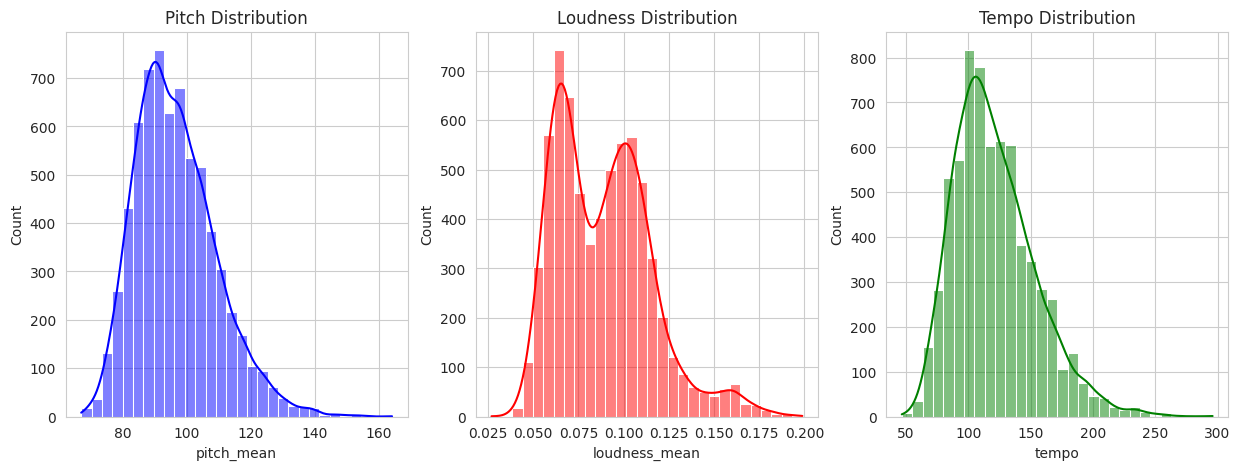

In [22]:
# Set Seaborn style
sns.set_style("whitegrid")

# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['pitch_mean'], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Pitch Distribution")

sns.histplot(df['loudness_mean'], bins=30, kde=True, ax=axes[1], color="red")
axes[1].set_title("Loudness Distribution")

sns.histplot(df['tempo'], bins=30, kde=True, ax=axes[2], color="green")
axes[2].set_title("Tempo Distribution")

plt.show()


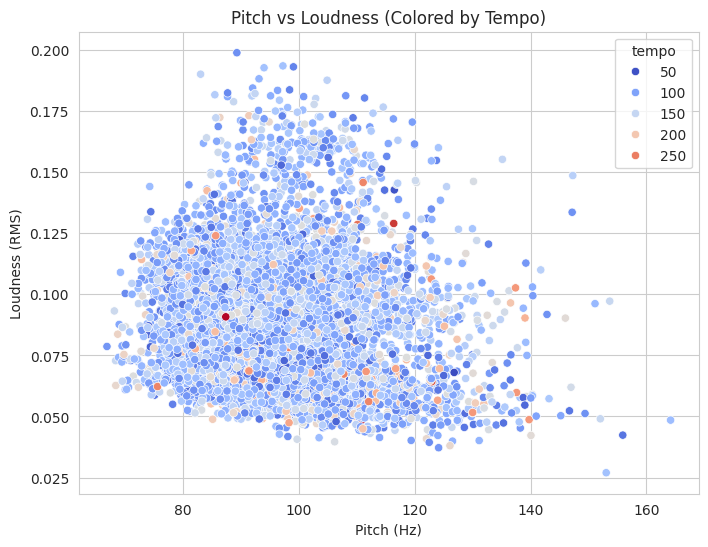

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["pitch_mean"], y=df["loudness_mean"], hue=df["tempo"], palette="coolwarm")
plt.title("Pitch vs Loudness (Colored by Tempo)")
plt.xlabel("Pitch (Hz)")
plt.ylabel("Loudness (RMS)")
plt.show()


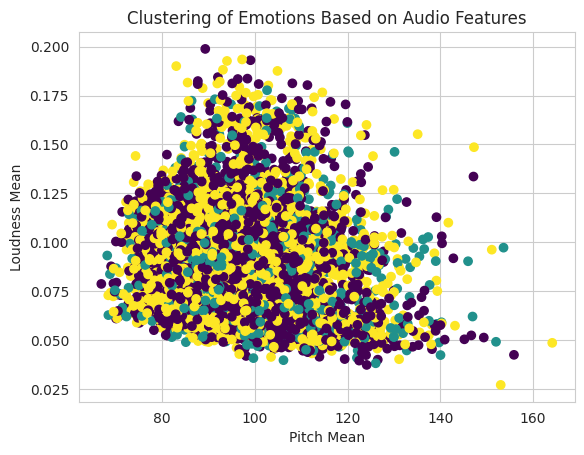

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/audio_features.csv")  # Change this to your actual CSV file

# Select features
features = df[['pitch_mean', 'loudness_mean', 'tempo']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['emotion_cluster'] = kmeans.fit_predict(features)

# Visualize Clusters
plt.scatter(df['pitch_mean'], df['loudness_mean'], c=df['emotion_cluster'], cmap='viridis')
plt.xlabel("Pitch Mean")
plt.ylabel("Loudness Mean")
plt.title("Clustering of Emotions Based on Audio Features")
plt.show()

# Save labeled data
df.to_csv("labeled_audio_data.csv", index=False)


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load labeled dataset
df = pd.read_csv("/content/labeled_audio_data.csv")  # Make sure you have emotion_cluster column

# Define features and target
X = df[['pitch_mean', 'loudness_mean', 'tempo']]
y = df['emotion_cluster']  # The auto-labeled emotion categories

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       584
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       556

    accuracy                           1.00      1353
   macro avg       1.00      1.00      1.00      1353
weighted avg       1.00      1.00      1.00      1353



In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib  # For saving the model

# Load the dataset
df = pd.read_csv("/content/labeled_audio_data.csv")  # Replace with your actual dataset file

# Features and labels
X = df[['pitch_mean', 'loudness_mean', 'tempo']]
y = df['emotion_cluster']

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model
joblib.dump(clf, "emotion_classifier.pkl")


Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       584
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       556

    accuracy                           1.00      1353
   macro avg       1.00      1.00      1.00      1353
weighted avg       1.00      1.00      1.00      1353



['emotion_classifier.pkl']

In [32]:
import joblib
import librosa
import numpy as np
import warnings

warnings.filterwarnings("ignore")  # Suppress unnecessary warnings

# Load the trained model
clf = joblib.load("emotion_classifier.pkl")

# Function to extract features from an audio file
def extract_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)

    # Extract pitch (Fundamental frequency)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_values = pitches[pitches > 0]
    pitch_mean = np.mean(pitch_values) if len(pitch_values) > 0 else 0

    # Extract loudness (Root Mean Square Energy)
    loudness = np.mean(librosa.feature.rms(y=y))

    # Extract tempo (Beats Per Minute) - Fix numpy deprecation issue
    tempo_result, _ = librosa.beat.beat_track(y=y, sr=sr)
    tempo = float(np.array(tempo_result).flatten()[0])  # Ensure a single float value

    return np.array([[pitch_mean, loudness, tempo]])  # Reshape properly

# Predict function
def predict_emotion(audio_path):
    features = extract_features(audio_path)

    # Ensure feature array matches training format
    feature_names = ["pitch_mean", "loudness_mean", "tempo"]
    features_dict = {name: [value] for name, value in zip(feature_names, features[0])}

    emotion_label = clf.predict(features)[0]
    emotion_map = {0: "Happy/Excited", 1: "Neutral/Sad", 2: "Angry/Frustrated"}
    return emotion_map.get(emotion_label, "Unknown")

# Example usage
audio_file = "/content/WhatsApp Ptt 2025-03-28 at 7.57.19 PM.ogg"  # Replace with a real file
emotion = predict_emotion(audio_file)
print(f"Predicted Emotion: {emotion}")


Predicted Emotion: Happy/Excited


In [29]:
from google.colab import files
files.download('emotion_classifier.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Example model (Use your trained model instead)
your_trained_model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(3,)),  # Adjust input shape
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(3, activation="softmax")  # 3 classes
])

# Compile the model
your_trained_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train your model (Use your dataset instead)
# your_trained_model.fit(X_train, y_train, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflowjs as tfjs

tfjs_target_dir = "/content/tfjs_model"
tfjs.converters.save_keras_model(your_trained_model, tfjs_target_dir)

# Zip and download
!zip -r model.zip tfjs_model
from google.colab import files
files.download("model.zip")


failed to lookup keras version from the file,
    this is likely a weight only file
  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/model.json (deflated 77%)
  adding: tfjs_model/group1-shard1of1.bin (deflated 10%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import tensorflowjs as tfjs

# Define the path where you want to save the model
tfjs_target_dir = "/content/tfjs_model"

# Convert and save the trained model
tfjs.converters.save_keras_model(your_trained_model, tfjs_target_dir)

# Zip the folder for easy download
!zip -r tfjs_model.zip tfjs_model


failed to lookup keras version from the file,
    this is likely a weight only file
  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/model.json (deflated 77%)
  adding: tfjs_model/group1-shard1of1.bin (deflated 10%)


In [26]:
import os
print(os.listdir())

['.config', 'WhatsApp Ptt 2025-03-26 at 10.02.35 AM.ogg', 'WhatsApp Ptt 2025-03-26 at 9.55.40 AM.ogg', 'WhatsApp Ptt 2025-03-26 at 7.47.01 PM.ogg', 'emotion_classifier.pkl', 'labeled_audio_data.csv', 'audio_features.csv', 'WhatsApp Ptt 2025-03-27 at 11.18.56 PM.ogg', 'hindi_female_english', 'hindi_female_english.zip', 'WhatsApp Ptt 2025-03-26 at 9.55.38 AM.ogg', 'sample_data']


In [34]:
from google.colab import files

# Write the feature extraction code to a file
with open('feature_extraction.py', 'w') as f:
    f.write('''import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

# Directory where audio files are stored
extract_path = "/content/hindi_female_english/english/wav"

# List all .wav files
audio_files = [f for f in os.listdir(extract_path) if f.endswith('.wav')]
print(f"Total Audio Files: {len(audio_files)}")

# Function to extract features
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)  # Load audio

        pitch = librosa.yin(y, fmin=50, fmax=300)  # Pitch estimation
        loudness = librosa.feature.rms(y=y)  # Loudness (RMS Energy)
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)  # Tempo estimation

        return {
            "file_name": os.path.basename(file_path),
            "pitch_mean": np.nanmean(pitch),
            "loudness_mean": np.nanmean(loudness),
            "tempo": tempo[0] if len(tempo) > 0 else 0  # Handle empty tempo values
        }
    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")
        return None

# Process all files with a progress bar
features_list = []
for file in tqdm(audio_files, desc="🔄 Extracting Features", unit="file"):
    file_path = os.path.join(extract_path, file)
    features = extract_features(file_path)
    if features:
        features_list.append(features)

# Convert to DataFrame
df = pd.DataFrame(features_list)

# Save to CSV for future use
df.to_csv("audio_features.csv", index=False)

print("\n✅ Feature extraction complete! Saved as audio_features.csv.")

''')

# Download the file to your local machine
files.download('feature_extraction.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import numpy as np

def extract_features(audio_path):
  y, sr = librosa.load(audio_path)
  pitch = np.mean(librosa.pitch_tuning(y))
  tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
  loudness = np.mean(librosa.feature.rms(y=y))
return [pitch, tempo, loudness]''')
files.download('feature_extraction.py')

SyntaxError: incomplete input (<ipython-input-31-c4ea806b308a>, line 8)

In [30]:
files.download("labeled_audio_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>